# Análise passo a passo com Jupyter Notebook
## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import seaborn as sns

## Gerando gráficos para a análise de dispersão

In [2]:
seattle = pd.read_csv('../seattle-weather.csv')
seattle = seattle.drop('date', axis=1)

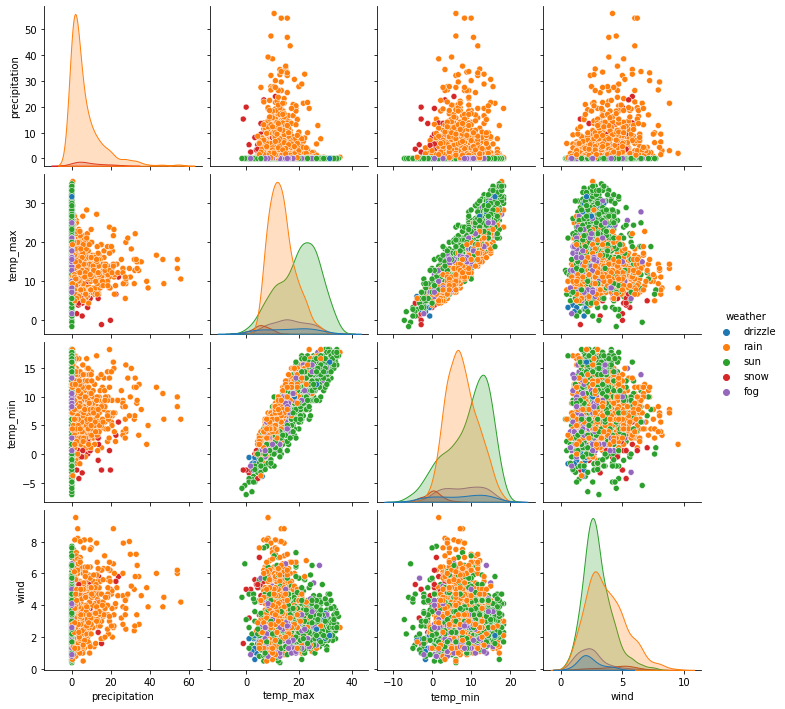

In [3]:
sns.pairplot(seattle, hue='weather')

## Classificação com *K-Means*

Organizando os dados

In [4]:
X = seattle.iloc[:, :-1].values
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


### Método do cotovelo
Ainda que se saiba o valor de *k* no dataset, uasaremos o método do cotovelo para saber quantos *clusters* poderiamos escolher caso a informação não estivesse disponível

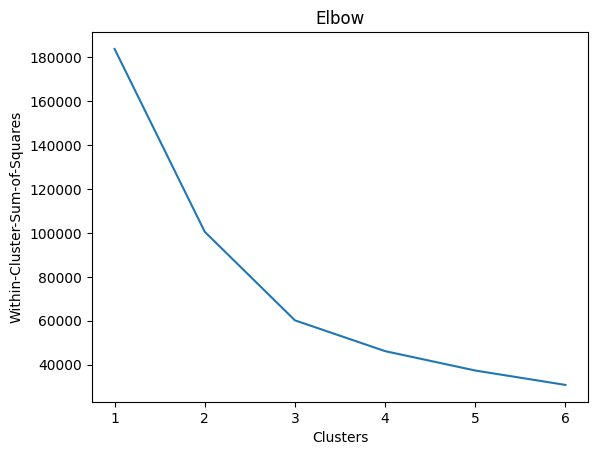

In [5]:
cotovelo = []
for i in range(1, 7):
    SKMeans = KMeans(n_clusters=i)
    SKMeans.fit(X)
    cotovelo.append(SKMeans.inertia_)
plt.plot(range(1, 7), cotovelo)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

O método do cotovelo sugere de 2 a 3 *clusters*, não tão preciso levando em consideração que o k, na verdade, vale 5

### Realizando a previsão - *KMeans* com *k=5*

In [6]:
SKMeans = KMeans(n_clusters=5, random_state=0)
SKMeans.fit(X)
seattle['k-means'] = SKMeans.labels_

### Análise gráfica da performance

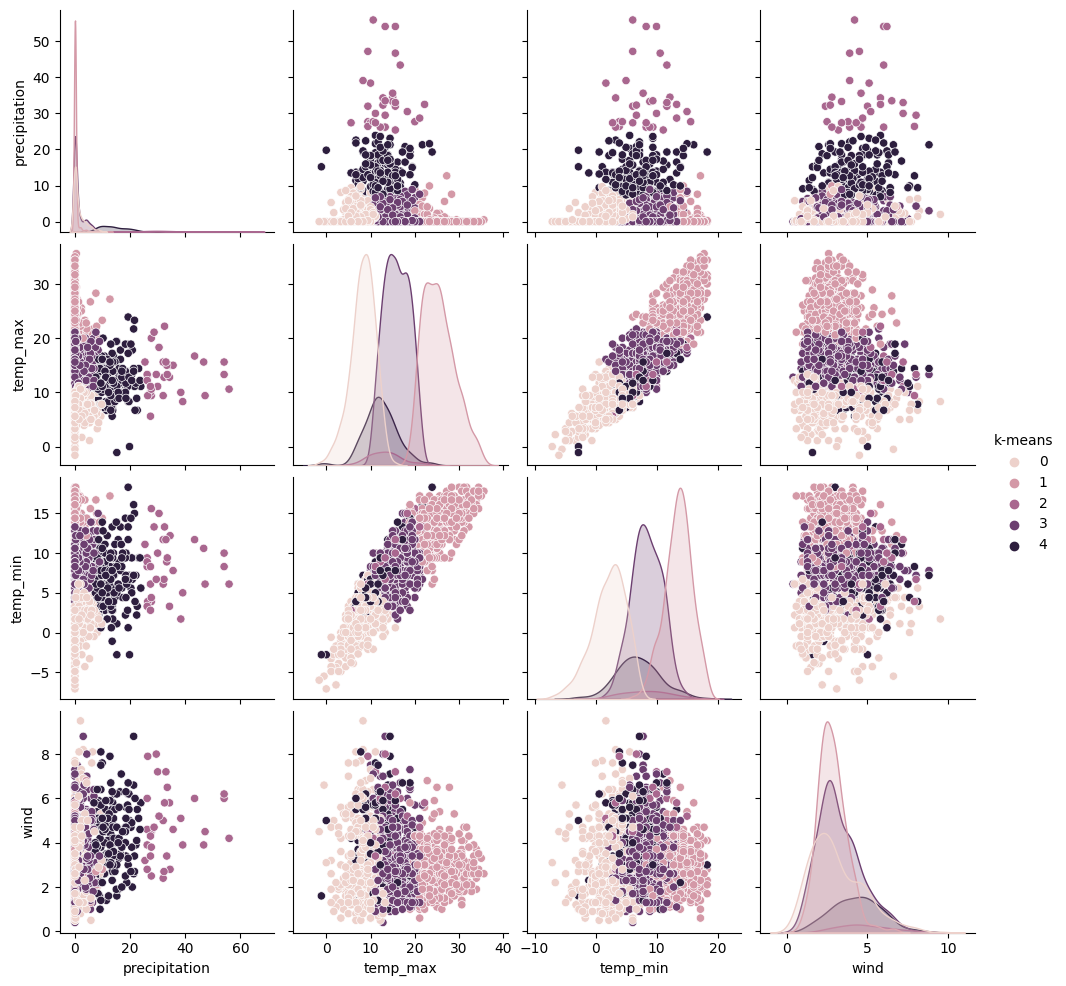

In [7]:
sns.pairplot(seattle, hue='k-means')